<a href="https://colab.research.google.com/github/jeffersonramelo/Minicurso_Decision_Tree/blob/main/Minicurso_%C3%A1rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets

# Carregar a base de dados Iris
iris = datasets.load_iris()

# Criar um DataFrame do pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar as primeiras 10 linhas do DataFrame
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


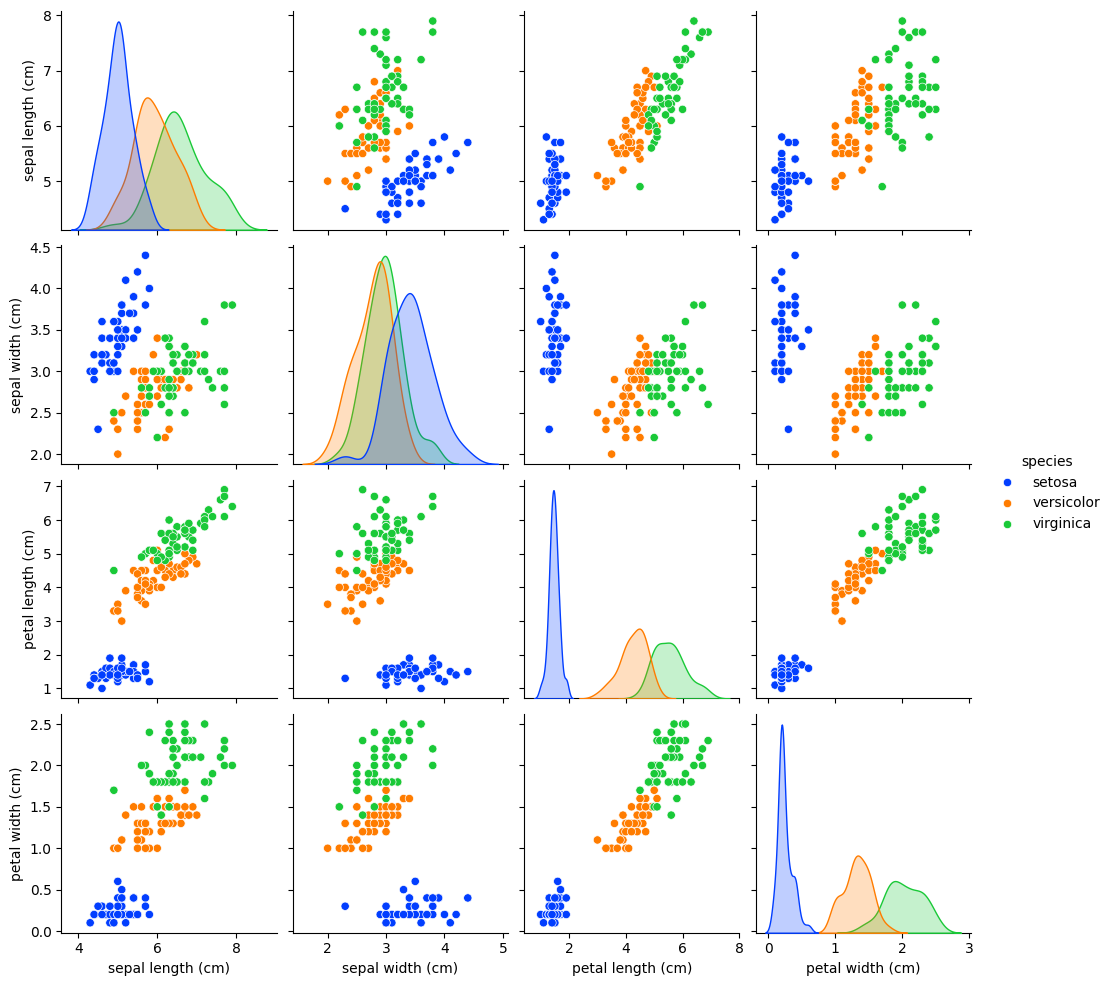

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# Carregar a base de dados Iris
iris = datasets.load_iris()

# Converter para um DataFrame do pandas
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Criar o pair plot com cores mais destacadas
sns.pairplot(iris_df, hue='species', palette='bright')

# Mostrar o gráfico
plt.show()


O algoritmo utilizado no exemplo é o CART (Classification and Regression Trees). O DecisionTreeClassifier do scikit-learn implementa o algoritmo CART. No exemplo fornecido, o DecisionTreeClassifier do scikit-learn por padrão utiliza o critério de Gini para divisão dos nós, o que é uma característica do algoritmo CART.

Se desejar utilizar um critério de classificação diferente no CART, como a entropia (mais próximo ao ID3), você pode especificar isso ao criar o classificador, basta trocar de 'gini' pra 'entropy'.:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')

O scikit-learn não fornece uma implementação direta do algoritmo C4.5. No entanto, você pode usar a biblioteca c45 disponível no PyPI, que é uma implementação do algoritmo C4.5 em Python.

Para utilizar o algoritmo CHAID, você pode utilizar a biblioteca CHAID em Python. A biblioteca CHAID pode ter algumas limitações em relação a funcionalidades e suporte, então é importante considerar isso ao escolher a ferramenta para seu projeto. Se precisar de mais informações ou assistência, estou à disposição!

AD COM DIVISÃO EM TREINO 70% E TESTE 30%

Acurácia: 1.00


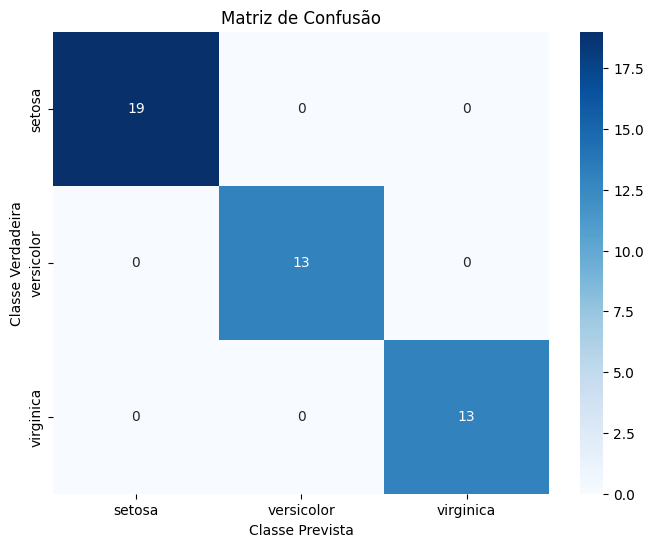

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC: 1.00


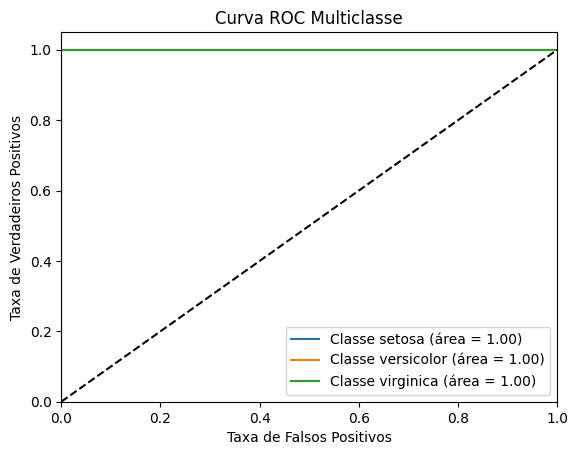

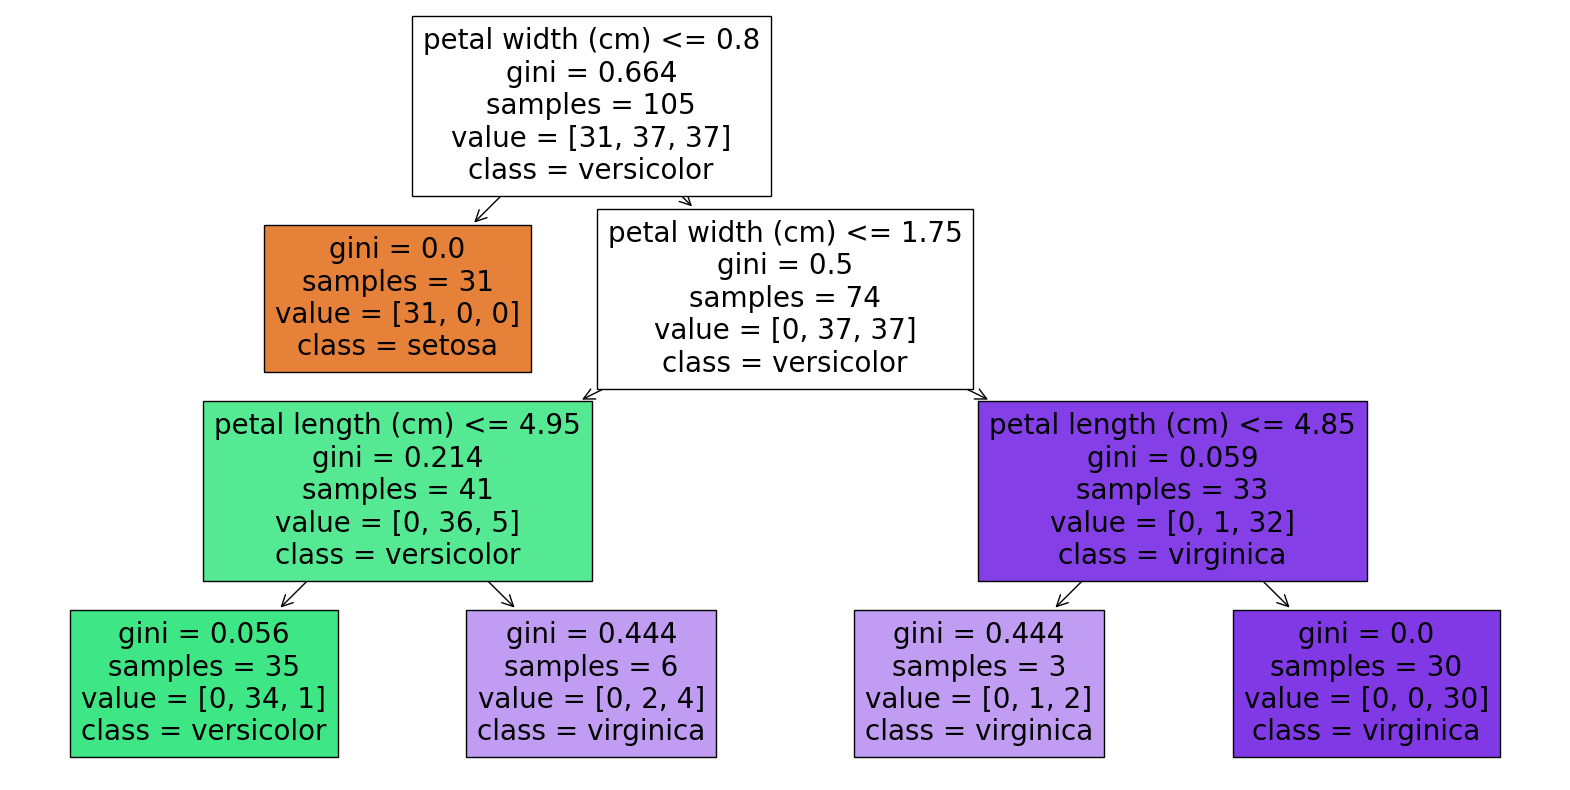

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Carregar a base de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de árvore de decisão com hiperparâmetros para controlar overfitting
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2)

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão como gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()

# Relatório de classificação
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Relatório de Classificação:")
print(class_report)

# Binarizar as labels para calcular a ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Calcular a AUC para cada classe e a média
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc:.2f}")

# Calcular as curvas ROC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plotar a curva ROC
plt.figure()
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'Classe {iris.target_names[i]} (área = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


AD COM VALIDAÇÃO CRUZADA

Acurácia Média com Validação Cruzada: 0.96


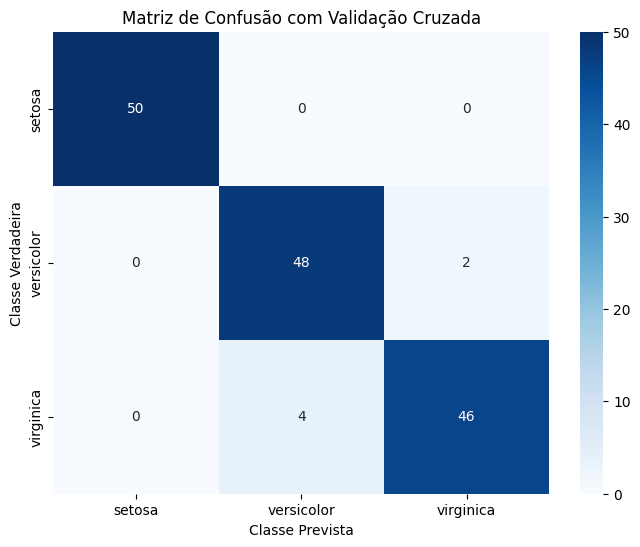

Relatório de Classificação com Validação Cruzada:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

ROC AUC com Validação Cruzada: 0.97


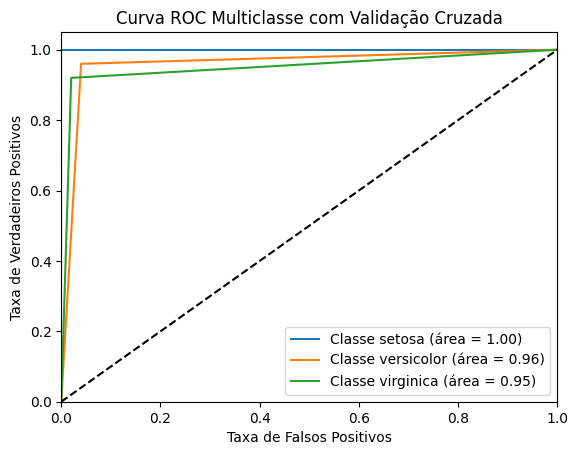

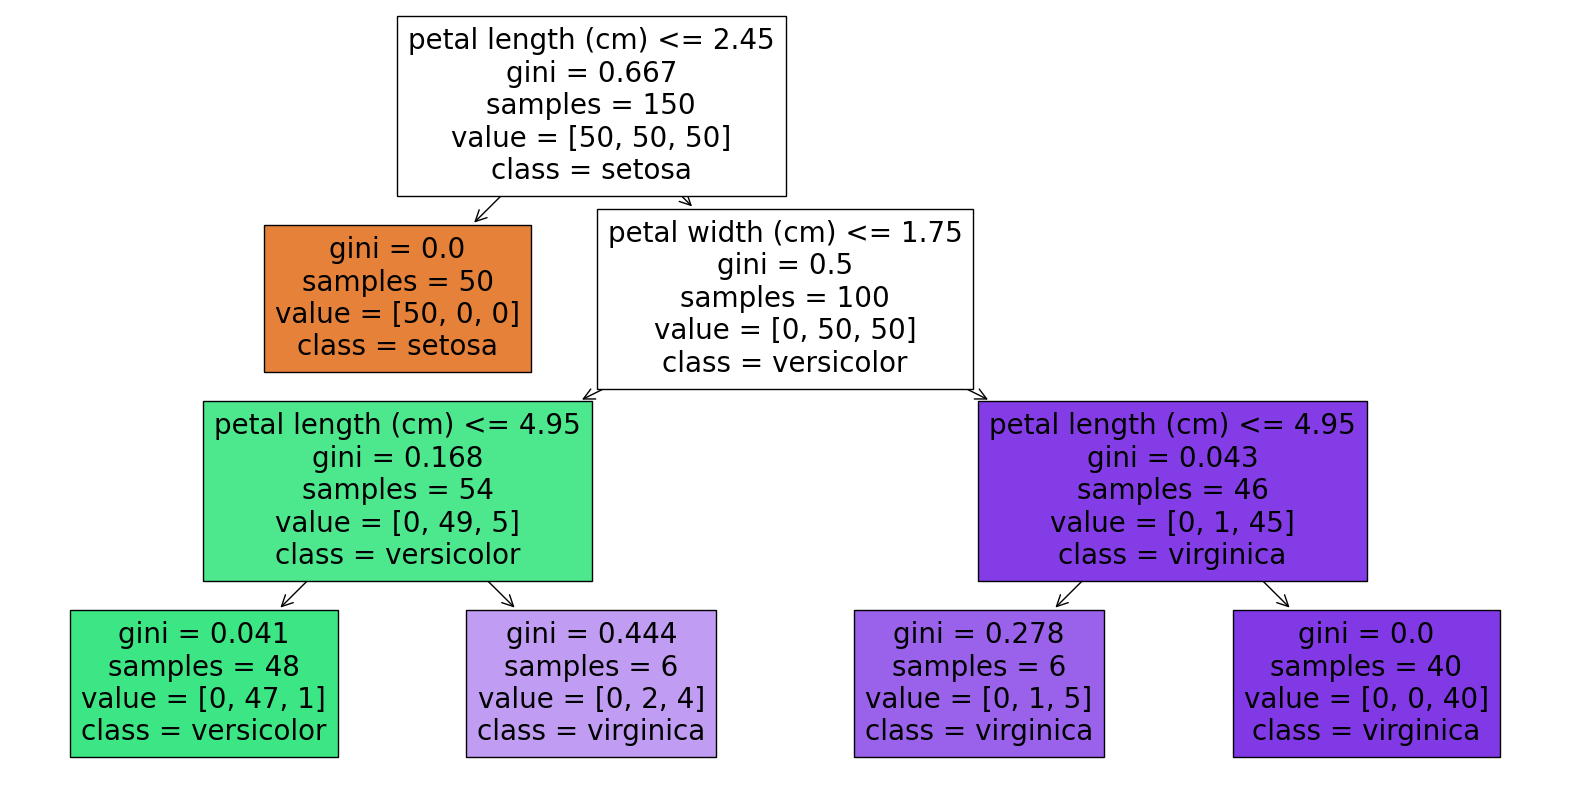

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Carregar a base de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Configurar o modelo de árvore de decisão com hiperparâmetros para controlar overfitting
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=6, min_samples_leaf=4)

# Configurar a validação cruzada com 10 folds
cv = StratifiedKFold(n_splits=10)

# Avaliar o modelo com validação cruzada
accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
y_pred_cv = cross_val_predict(clf, X, y, cv=cv)

# Calcular a acurácia média
accuracy_mean = accuracy_scores.mean()
print(f"Acurácia Média com Validação Cruzada: {accuracy_mean:.2f}")

# Matriz de confusão com validação cruzada
conf_matrix_cv = confusion_matrix(y, y_pred_cv)

# Exibir a matriz de confusão como gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão com Validação Cruzada')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()

# Relatório de classificação com validação cruzada
class_report_cv = classification_report(y, y_pred_cv, target_names=iris.target_names)
print("Relatório de Classificação com Validação Cruzada:")
print(class_report_cv)

# Binarizar as labels para calcular a ROC AUC com validação cruzada
y_bin = label_binarize(y, classes=[0, 1, 2])
y_pred_bin_cv = label_binarize(y_pred_cv, classes=[0, 1, 2])

# Calcular a AUC para cada classe e a média com validação cruzada
roc_auc_cv = roc_auc_score(y_bin, y_pred_bin_cv, average='macro')
print(f"ROC AUC com Validação Cruzada: {roc_auc_cv:.2f}")

# Calcular as curvas ROC com validação cruzada
fpr_cv = {}
tpr_cv = {}
roc_auc_individual_cv = {}

for i in range(len(iris.target_names)):
    fpr_cv[i], tpr_cv[i], _ = roc_curve(y_bin[:, i], y_pred_bin_cv[:, i])
    roc_auc_individual_cv[i] = roc_auc_score(y_bin[:, i], y_pred_bin_cv[:, i])

# Plotar a curva ROC com validação cruzada
plt.figure()
for i in range(len(iris.target_names)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'Classe {iris.target_names[i]} (área = {roc_auc_individual_cv[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse com Validação Cruzada')
plt.legend(loc="lower right")
plt.show()

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
clf.fit(X, y)  # Treinando o modelo com todos os dados para visualização
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


MODELO LOGIT EM TREINO 70% E TESTE 30%

Acurácia: 1.00


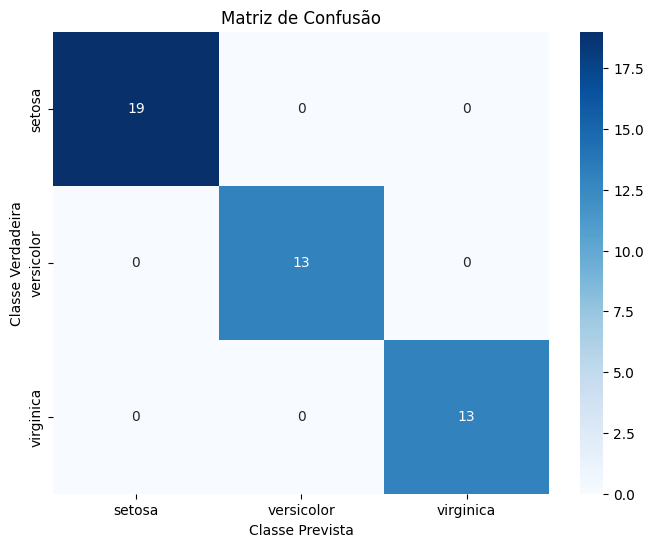

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC: 1.00


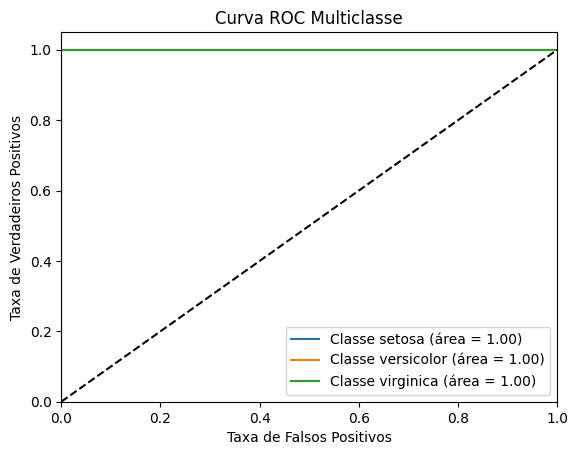

In [3]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Carregar a base de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
clf = LogisticRegression(max_iter=200)

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão como gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()

# Relatório de classificação
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Relatório de Classificação:")
print(class_report)

# Binarizar as labels para calcular a ROC AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = clf.predict_proba(X_test)  # Para ROC, precisamos das probabilidades

# Calcular a AUC para cada classe e a média
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')
print(f"ROC AUC: {roc_auc:.2f}")

# Calcular as curvas ROC
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plotar a curva ROC
plt.figure()
for i in range(len(iris.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'Classe {iris.target_names[i]} (área = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()


LOGIT com validação cruzada

Acurácia Média com Validação Cruzada: 0.97


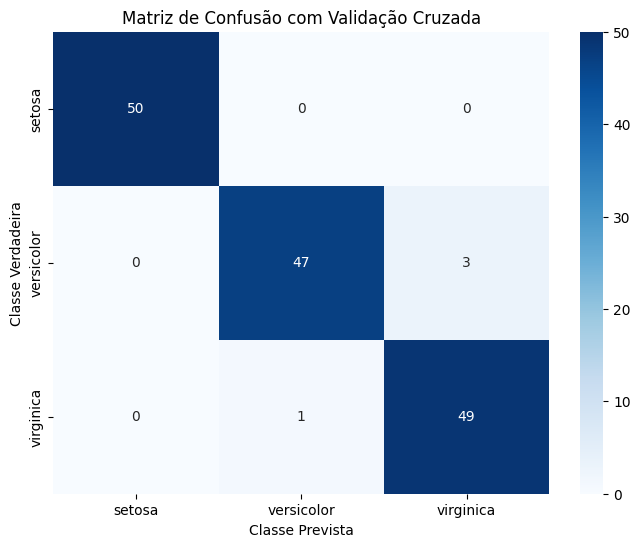

Relatório de Classificação com Validação Cruzada:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

ROC AUC com Validação Cruzada: 1.00


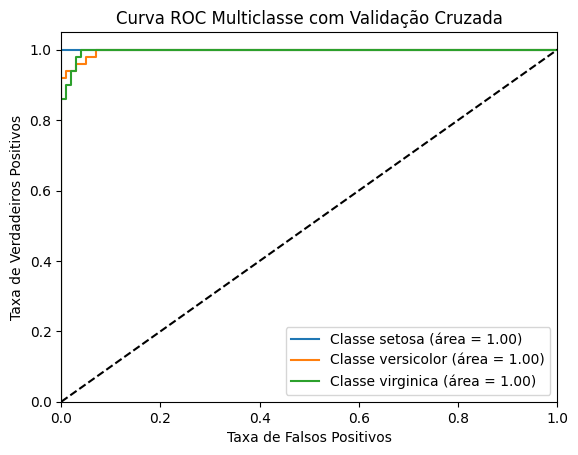

In [4]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Carregar a base de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Configurar o modelo de regressão logística
clf = LogisticRegression(max_iter=200)

# Configurar a validação cruzada com 10 folds
cv = StratifiedKFold(n_splits=10)

# Avaliar o modelo com validação cruzada
accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
y_pred_cv = cross_val_predict(clf, X, y, cv=cv, method='predict')

# Calcular a acurácia média
accuracy_mean = accuracy_scores.mean()
print(f"Acurácia Média com Validação Cruzada: {accuracy_mean:.2f}")

# Matriz de confusão com validação cruzada
conf_matrix_cv = confusion_matrix(y, y_pred_cv)

# Exibir a matriz de confusão como gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão com Validação Cruzada')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()

# Relatório de classificação com validação cruzada
class_report_cv = classification_report(y, y_pred_cv, target_names=iris.target_names)
print("Relatório de Classificação com Validação Cruzada:")
print(class_report_cv)

# Binarizar as labels para calcular a ROC AUC com validação cruzada
y_bin = label_binarize(y, classes=[0, 1, 2])
y_pred_prob_cv = cross_val_predict(clf, X, y, cv=cv, method='predict_proba')

# Calcular a AUC para cada classe e a média com validação cruzada
roc_auc_cv = roc_auc_score(y_bin, y_pred_prob_cv, average='macro')
print(f"ROC AUC com Validação Cruzada: {roc_auc_cv:.2f}")

# Calcular as curvas ROC com validação cruzada
fpr_cv = {}
tpr_cv = {}
roc_auc_individual_cv = {}

for i in range(len(iris.target_names)):
    fpr_cv[i], tpr_cv[i], _ = roc_curve(y_bin[:, i], y_pred_prob_cv[:, i])
    roc_auc_individual_cv[i] = roc_auc_score(y_bin[:, i], y_pred_prob_cv[:, i])

# Plotar a curva ROC com validação cruzada
plt.figure()
for i in range(len(iris.target_names)):
    plt.plot(fpr_cv[i], tpr_cv[i], label=f'Classe {iris.target_names[i]} (área = {roc_auc_individual_cv[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse com Validação Cruzada')
plt.legend(loc="lower right")
plt.show()


**REGRESSÃO COM DECISION TREE**

In [ ]:
# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Mean Squared Error (MSE) Médio no Treino: 3373991643.09 ± 57146859.45
R-squared (R2) Médio no Treino: 0.75 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 3986234626.97 ± 187329287.04
R-squared (R2) Médio no Teste: 0.70 ± 0.01


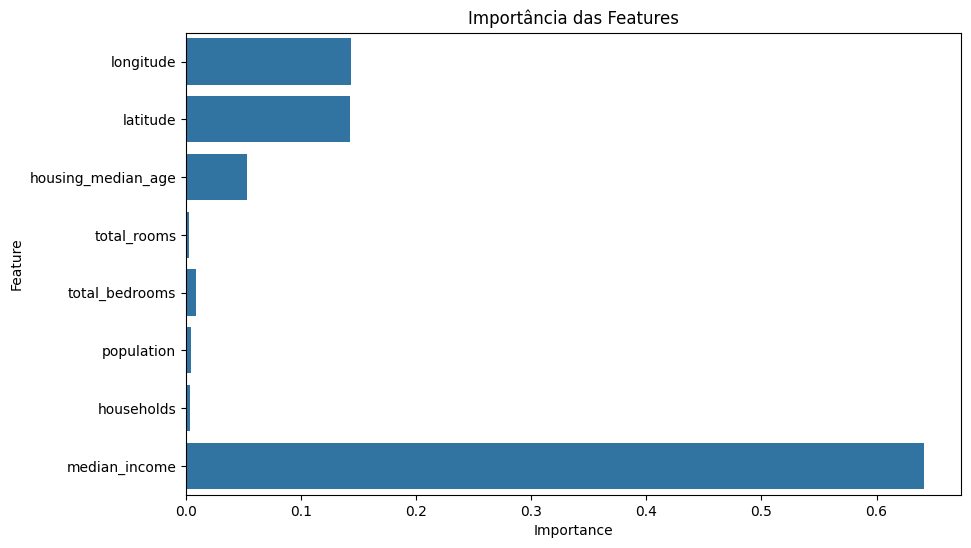

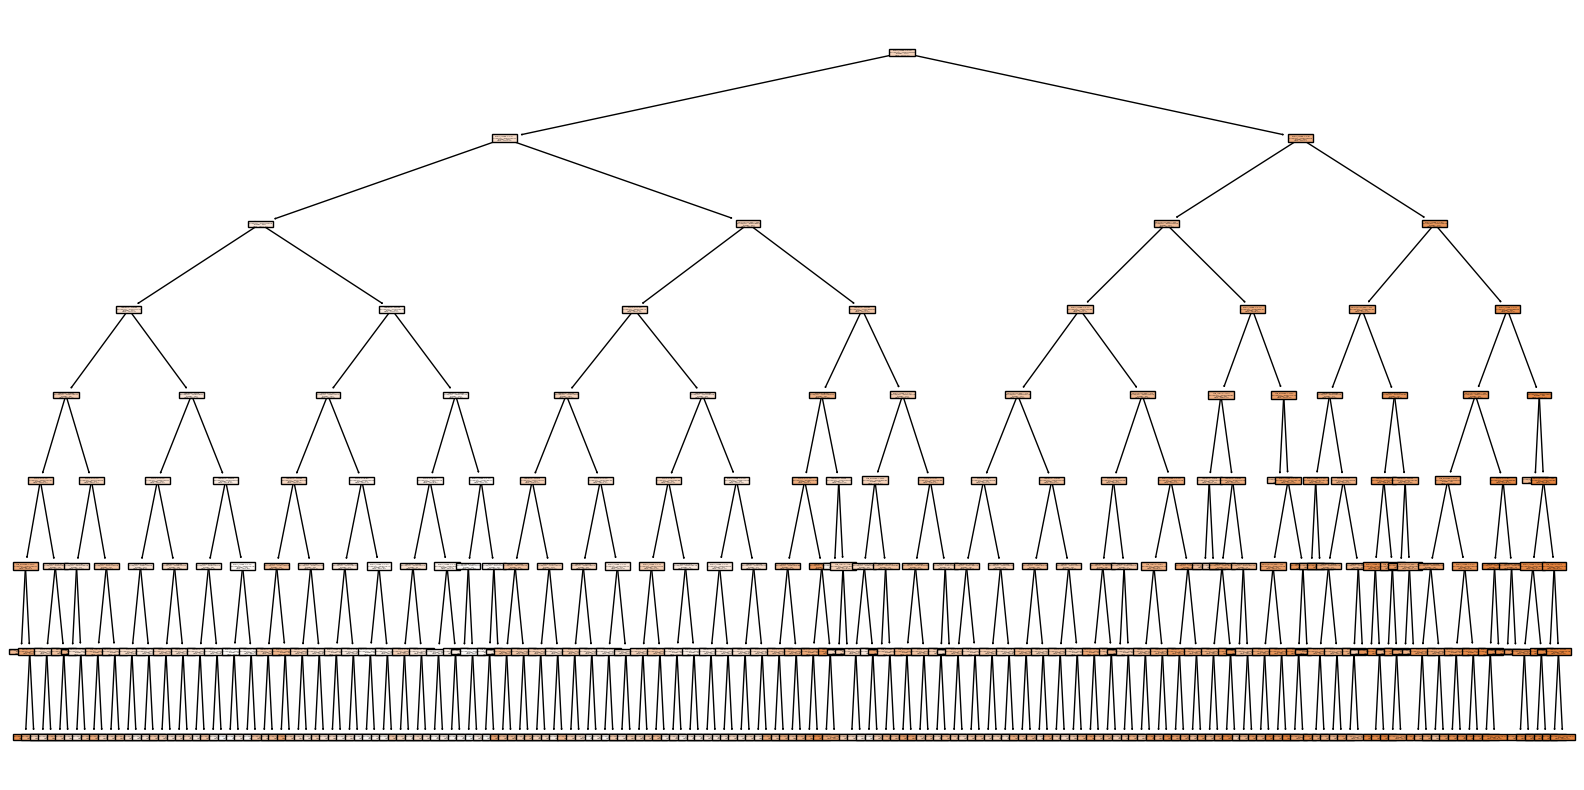

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar o modelo de árvore de decisão para regressão
model = DecisionTreeRegressor(max_depth=8, min_samples_split=15, min_samples_leaf=10, random_state=42)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
model.fit(X, y)

# Calcular a importância das features
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Importância das Features')
plt.show()

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


In [ ]:
**REGRESSÃO COM OLS**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Carregar a base de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(data.head())

# Selecionar as features (X) e o target (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Adicionar uma constante para o termo intercepto
X = sm.add_constant(X)

# Configurar o K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
mse_train_scores = []
r2_train_scores = []
mse_test_scores = []
r2_test_scores = []

# Executar a validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Criar e treinar o modelo de regressão linear
    model = sm.OLS(y_train, X_train).fit()

    # Fazer previsões no conjunto de teste
    y_test_pred = model.predict(X_test)

    # Calcular as métricas para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Fazer previsões no conjunto de treino
    y_train_pred = model.predict(X_train)

    # Calcular as métricas para o conjunto de treino
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Armazenar as métricas
    mse_train_scores.append(mse_train)
    r2_train_scores.append(r2_train)
    mse_test_scores.append(mse_test)
    r2_test_scores.append(r2_test)

# Calcular a média e desvio padrão das métricas
mean_mse_train = np.mean(mse_train_scores)
std_mse_train = np.std(mse_train_scores)
mean_r2_train = np.mean(r2_train_scores)
std_r2_train = np.std(r2_train_scores)

mean_mse_test = np.mean(mse_test_scores)
std_mse_test = np.std(mse_test_scores)
mean_r2_test = np.mean(r2_test_scores)
std_r2_test = np.std(r2_test_scores)

print(f"Mean Squared Error (MSE) Médio no Treino: {mean_mse_train:.2f} ± {std_mse_train:.2f}")
print(f"R-squared (R2) Médio no Treino: {mean_r2_train:.2f} ± {std_r2_train:.2f}")
print(f"Mean Squared Error (MSE) Médio no Teste: {mean_mse_test:.2f} ± {std_mse_test:.2f}")
print(f"R-squared (R2) Médio no Teste: {mean_r2_test:.2f} ± {std_r2_test:.2f}")

# Treinar o modelo em todos os dados
final_model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(final_model.summary())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
Mean Squared Error (MSE) Médio no Treino: 4822967843.03 ± 34074604.71
R-squared (R2) Médio no Treino: 0.64 ± 0.00
Mean Squared Error (MSE) Médio no Teste: 4855789435.65 ± 